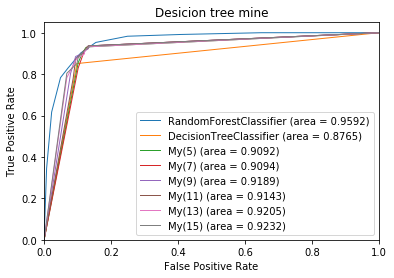

In [20]:
import matplotlib.pyplot as plt
import math

from subprocess import check_output
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def getOutput(command):
    return ''.join(map(chr, check_output(command.split())))
def getLabels(y):
    return '\n'.join(map(str, y))
def getFeatures(X):
    return '\n'.join(map(lambda s: ' '.join(map(str, map(lambda x: math.floor(x * 1000), s))) + ' ', X)) + '\n'

plt.figure()
lw = 1

X, y = make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

path = 'trees/dataset'
open(path + 'Train.data', 'w').write(getFeatures(X_train))
open(path + 'Train.labels', 'w').write(getLabels(y_train))
open(path + 'Test.data', 'w').write(getFeatures(X_test))
open(path + 'Test.labels', 'w').write(getLabels(y_test))

classifiers = [RandomForestClassifier(), DecisionTreeClassifier()]
for classifier in classifiers:
    s = str(classifier)
    s = s[:s.find('(')]
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, lw=lw, label=s + ' (area = %0.4f)' % auc(fpr, tpr))

getOutput('javac Main.java Instance.java DecisionTree.java RandomForest.java Result.java')
for i in range(5, 16, 2):
    java = list(map(float, getOutput('java -cp ../../../ ru.igorjan94.randomForest.Main 2 ' + str(i)).split('OUTPUT')[1].split('\n')[1:-1]))
    fpr, tpr, _ = roc_curve(y_test, java)
    plt.plot(fpr, tpr, lw=lw, label='My(%d) (area = %0.4f)' % (i, auc(fpr, tpr)))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Desicion tree mine')
plt.legend(loc="lower right")
plt.show()
# count of features: 20
# count of informative: 2
# n_samples: 1000

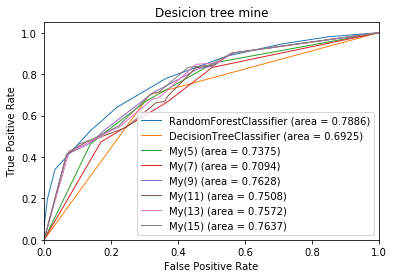

In [19]:
import matplotlib.pyplot as plt
import math

from subprocess import check_output
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def getOutput(command):
    return ''.join(map(chr, check_output(command.split())))
def getLabels(y):
    return '\n'.join(map(str, y))
def getFeatures(X):
    return '\n'.join(map(lambda s: ' '.join(map(str, map(lambda x: math.floor(x * 1000), s))) + ' ', X)) + '\n'

plt.figure()
lw = 1

X, y = make_classification(n_samples=1000, n_informative=6, n_features=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=0)

path = 'trees/dataset'
open(path + 'Train.data', 'w').write(getFeatures(X_train))
open(path + 'Train.labels', 'w').write(getLabels(y_train))
open(path + 'Test.data', 'w').write(getFeatures(X_test))
open(path + 'Test.labels', 'w').write(getLabels(y_test))

classifiers = [RandomForestClassifier(), DecisionTreeClassifier()]
for classifier in classifiers:
    s = str(classifier)
    s = s[:s.find('(')]
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, lw=lw, label=s + ' (area = %0.4f)' % auc(fpr, tpr))

getOutput('javac Main.java Instance.java DecisionTree.java RandomForest.java Result.java')
for i in range(5, 16, 2):
    java = list(map(float, getOutput('java -cp ../../../ ru.igorjan94.randomForest.Main 2 ' + str(i)).split('OUTPUT')[1].split('\n')[1:-1]))
    fpr, tpr, _ = roc_curve(y_test, java)
    plt.plot(fpr, tpr, lw=lw, label='My(%d) (area = %0.4f)' % (i, auc(fpr, tpr)))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Desicion tree mine')
plt.legend(loc="lower right")
plt.show()
# count of features: 30
# count of informative: 6
# n_samples: 1000